### 3.1 Mini Projects: Fake Data Task
--------
* Project description:
Create a NumPy array called X_train with 10,000 rows, and 100 columns, such that

Half of the rows are pure noise, from a uniform random distribution between -1 and 1

The other half are the same kind of noise, PLUS a sine wave (the "signal")

You can pick an amplitude and frequency for the sine wave as you wish

Create a 1-dimensional NumPy array y_train with 10,000 entries, so that

the entries corresponding the the pure noise rows in X_train are 0, and

the entries corresponding to the noise+sine wave rows are 1

Similarly create two separate arrays called X_test and y_test; these will be used to evaluate neural net models

Visualize a few noise rows and a few signal rows for a quick sanity check (do you actually see the signal with your eye?)

Using the approach in Tensorflow quick start beginner tutorial, train a neural network using X_train, y_train to learn to distinguish the noise rows from the signal rows. (Tutorial link here: https://www.tensorflow.org/tutorials/quickstart/beginner)

Evaluate your model on the test set X_test, y_test (what is the accuracy?)

#### Creating Our Data
-----------------

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
import tensorflow as tf

* Create a NumPy array called **x_train**  with **10,000 rows and 100 columns**, such that

    * Half of the rows are pure noise, created by sampling from a **uniform random distribution between -1 and 1.**
    * The other half is a noisy signal, created by adding pure noise (between -1 and 1 again) to a pure sine wave

In [126]:
a=4
f=5

In [127]:
x_train=np.random.uniform(-1,1,(5000,100))
t=np.linspace(0,1,100)
sine=a*np.sin(f*np.pi*t)
for i in range(5000):
  x_train = np.vstack([x_train, sine+np.random.uniform(-1,1,(1,100))])

* Now create a 1-dimensional NumPy array **y_train** with 10,000 entries, so that:

    * the entries corresponding to the pure noise rows in x_train are 0 (no event), and
    * the entries corresponding to the noise+sine wave rows are 1 (event)

In [128]:
y_train = np.zeros(10000)
y_train[5000:] = 1

In [129]:
y_train

array([0., 0., 0., ..., 1., 1., 1.])

* Similarly, create arrays called **x_test and y_test**, using the same methods you used to create x_train and y_train, respectively. These will be used for testing your model performance in the end.

In [130]:
x_test=np.random.uniform(-1,1,(5000,100))
t=np.linspace(0,1,100)
sine=a*np.sin(f*np.pi*t)
for i in range(5000):
  x_test = np.vstack([x_test, sine+np.random.uniform(-1,1,(1,100))])
y_test = np.zeros(10000)
y_test[5000:] = 1

* **Visualize a few of your noise rows and a few of your noisy signal rows** for a quick sanity check. You should be able to see a noisy sine wave for the signal rows, and should see that pure noise rows look pretty random.

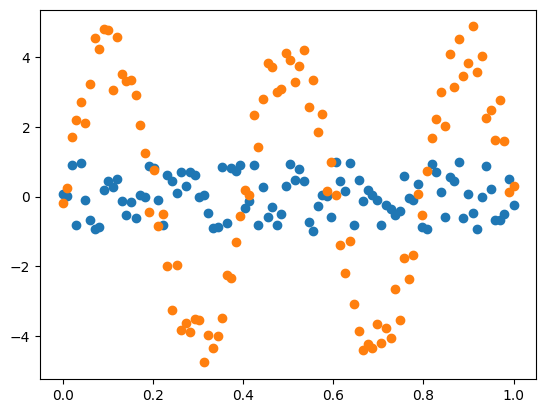

In [131]:
plt.plot(t,x_train[4000],'o')
x_train[4000]
x_train[9000]
plt.plot(t,x_train[9000],'o')
plt.show()

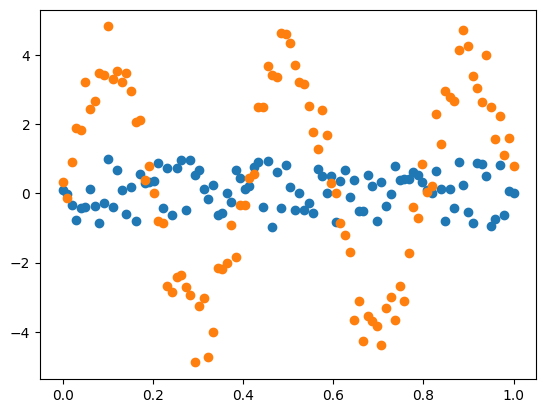

In [132]:
plt.plot(t,x_test[4000],'o')
x_test[4000]
x_test[9000]
plt.plot(t,x_test[9000],'o')
plt.show()

### Training our Model
-------------
* Train a neural network using x_train, y_train as your training observations and labels, in order to learn to distinguish the noise rows from the noisy signal rows.

In [133]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_shape=(100,),activation='sigmoid'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6832 - loss: 0.5816 - val_accuracy: 1.0000 - val_loss: 0.0890
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0957 - val_accuracy: 1.0000 - val_loss: 0.0201
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss:

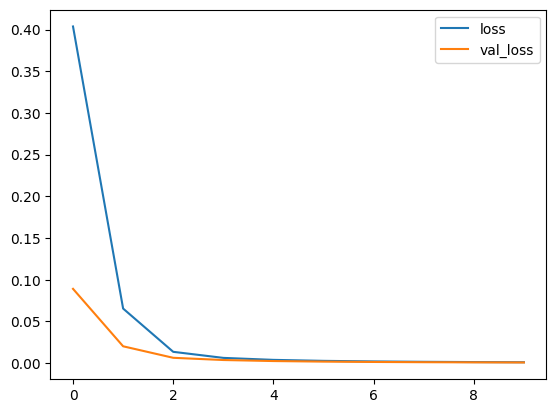

In [134]:
history=model.fit(x_train,y_train,epochs=10,batch_size=256,validation_split=0.2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

### Evaluating Our Model

In [135]:
loss=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.5398e-04


In [136]:
print(f'accuracy is: {loss[1]}')

accuracy is: 1.0


In [137]:
predicted_labels = (model.predict(x_test) > 0.5).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


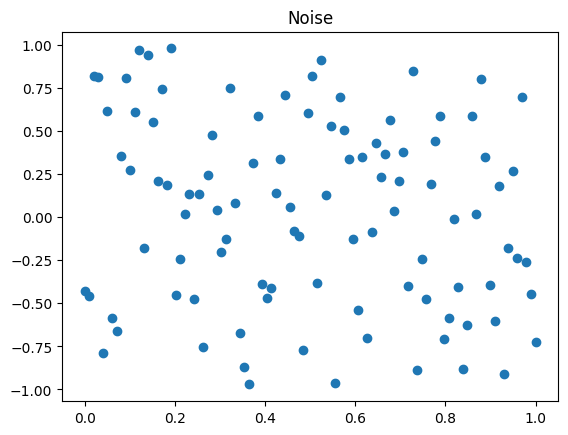

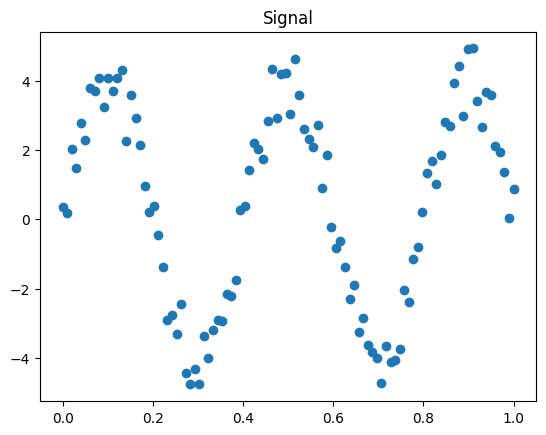

In [138]:
for i in range(2):
  label='Signal' if predicted_labels[4999+i]==1 else 'Noise'
  plt.plot(t,x_test[4999+i],'o')
  plt.title(label)
  plt.show()

what if the noise where higher? at what point do we loose acuracy?

In [185]:
a=5
f=5
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='sigmoid',input_shape=(100,)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

x_train=np.random.uniform(-10,10,(5000,100))
t=np.linspace(0,1,100)
sine=a*np.sin(f*np.pi*t)
for i in range(5000):
  x_train = np.vstack([x_train, sine+np.random.uniform(-10,10,(1,100))])

x_test=np.random.uniform(-10,10,(5000,100))
for i in range(5000):
  x_test = np.vstack([x_test, sine+np.random.uniform(-5,5,(1,100))])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


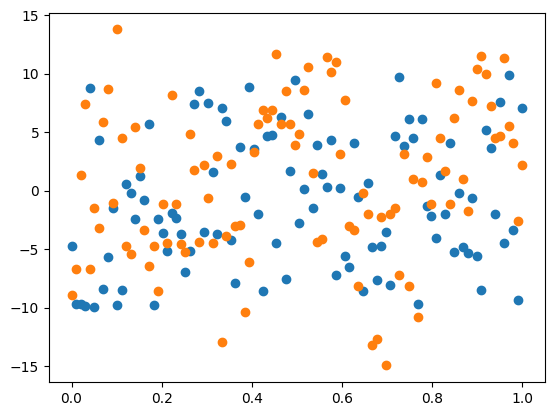

In [186]:
plt.plot(t,x_train[4000],'o')
x_train[4000]
x_train[9000]
plt.plot(t,x_train[9000],'o')
plt.show()

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6827 - loss: 0.5852 - val_accuracy: 0.9985 - val_loss: 0.1606
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.1085 - val_accuracy: 0.9900 - val_loss: 0.0678
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0333 - val_accuracy: 0.9955 - val_loss: 0.0331
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0155 - val_accuracy: 0.9930 - val_loss: 0.0315
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0094 - val_accuracy: 0.9955 - val_loss: 0.0204
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0066 - val_accuracy: 0.9955 - val_loss: 0.0182
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9993 - loss: 0.0048 - val_accuracy: 0.9950 - val_loss: 0.0188
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0034 - val_accuracy: 0.9960 - val_loss:

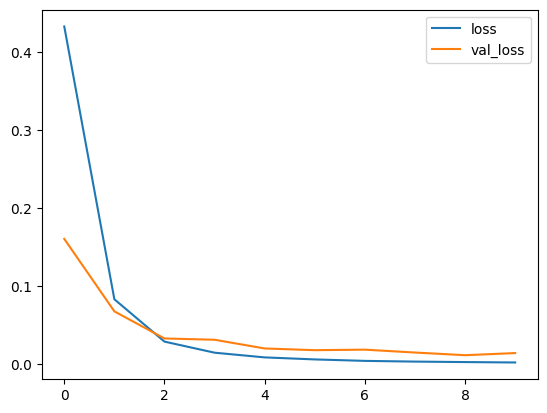

In [187]:
history=model2.fit(x_train,y_train,epochs=10,batch_size=256,validation_split=0.2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

not as good but still acurate

In [188]:
loss=model2.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9835 - loss: 0.0438


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


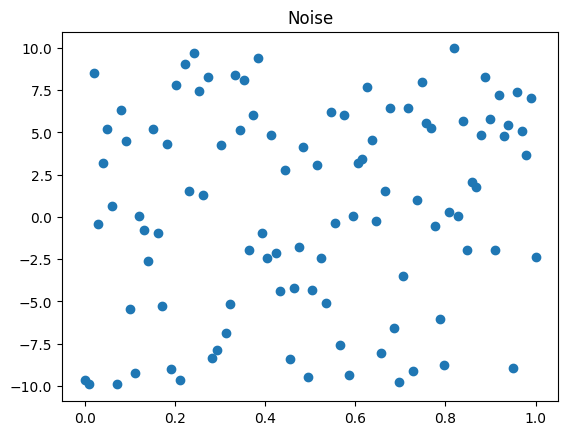

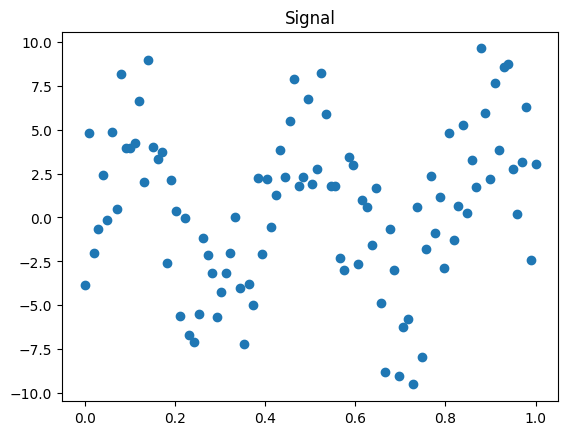

In [189]:
predicted_labels = (model2.predict(x_test) > 0.5).astype(int)
for i in range(2):
  label='Signal' if predicted_labels[4999+i]==1 else 'Noise'
  plt.plot(t,x_test[4999+i],'o')
  plt.title(label)
  plt.show()

what if the frequency were higher so that the dips and ups of the wave are harder to spot?

In [190]:
a=5
f=50
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='sigmoid',input_shape=(100,)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

x_train=np.random.uniform(-10,10,(5000,100))
t=np.linspace(0,1,100)
sine=a*np.sin(f*np.pi*t)
for i in range(5000):
  x_train = np.vstack([x_train, sine+np.random.uniform(-10,10,(1,100))])

x_test=np.random.uniform(-10,10,(5000,100))
for i in range(5000):
  x_test = np.vstack([x_test, sine+np.random.uniform(-5,5,(1,100))])

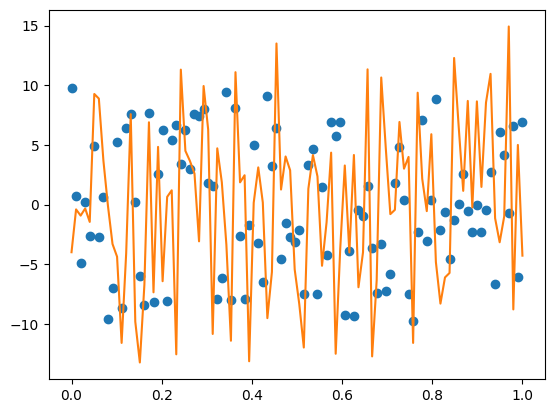

In [191]:
plt.plot(t,x_train[4000],'o')
x_train[4000]
x_train[9000]
plt.plot(t,x_train[9000])
plt.show()

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8662 - loss: 0.3805 - val_accuracy: 0.9940 - val_loss: 0.1124
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.0564 - val_accuracy: 0.9960 - val_loss: 0.0332
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9962 - loss: 0.0205 - val_accuracy: 0.9950 - val_loss: 0.0258
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9977 - loss: 0.0109 - val_accuracy: 0.9930 - val_loss: 0.0226
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9992 - loss: 0.0063 - val_accuracy: 0.9945 - val_loss: 0.0207
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0039 - val_accuracy: 0.9950 - val_loss: 0.0173
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9960 - val_loss: 0.0131
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.9955 - val_loss

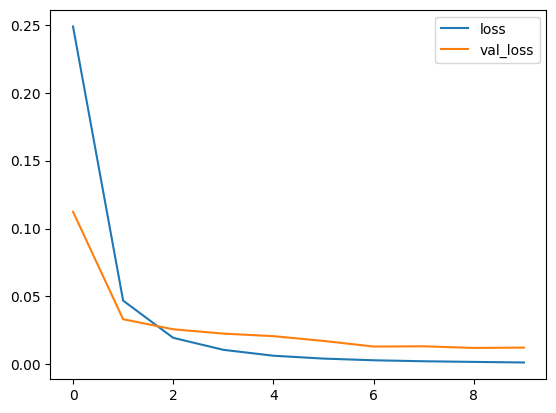

In [192]:
history=model3.fit(x_train,y_train,epochs=10,batch_size=256,validation_split=0.2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [193]:
loss=model3.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9871 - loss: 0.0387


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


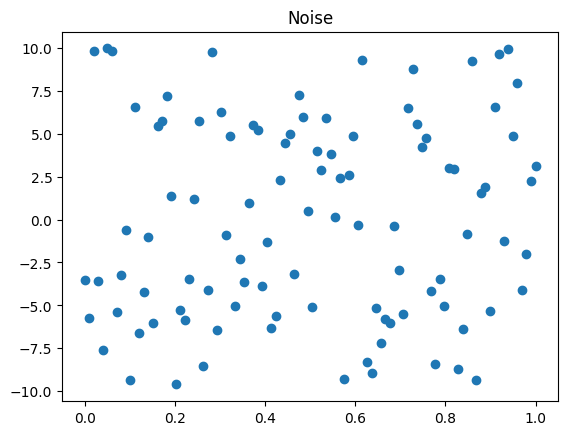

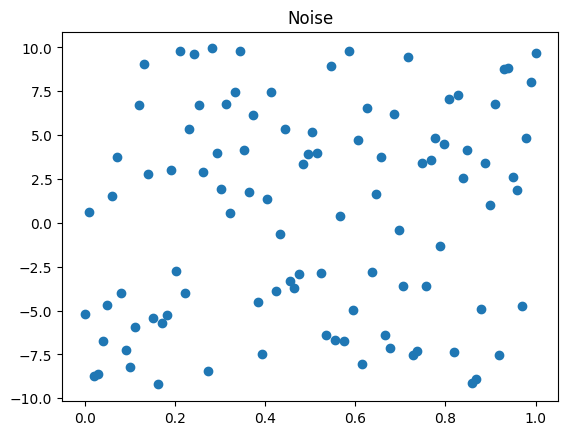

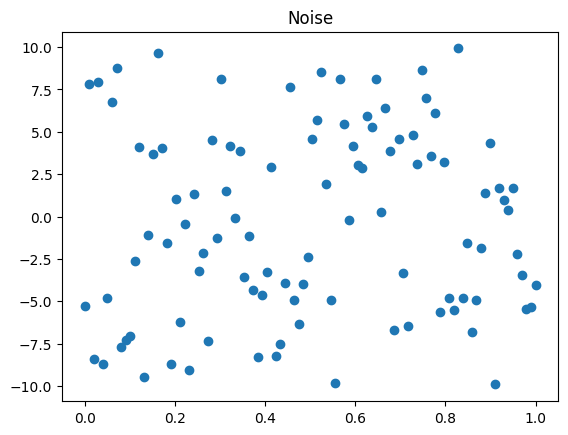

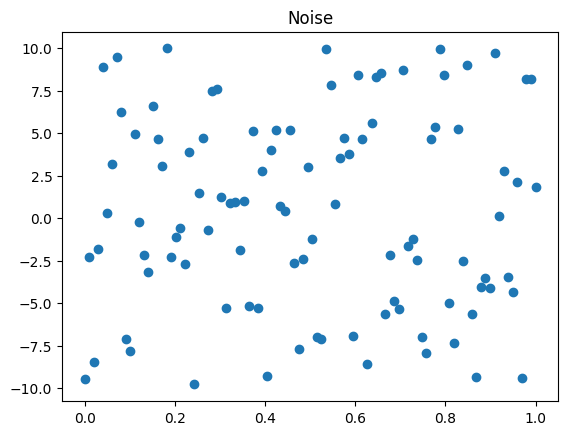

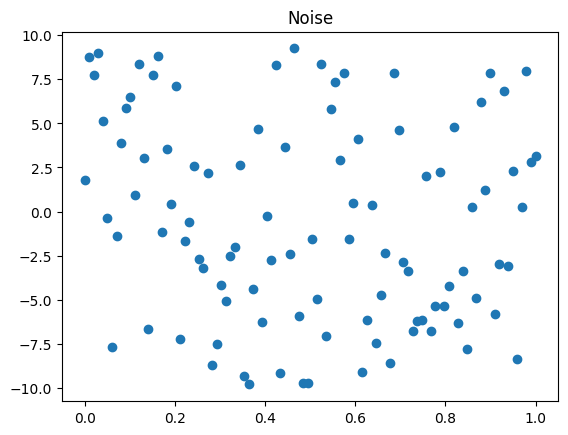

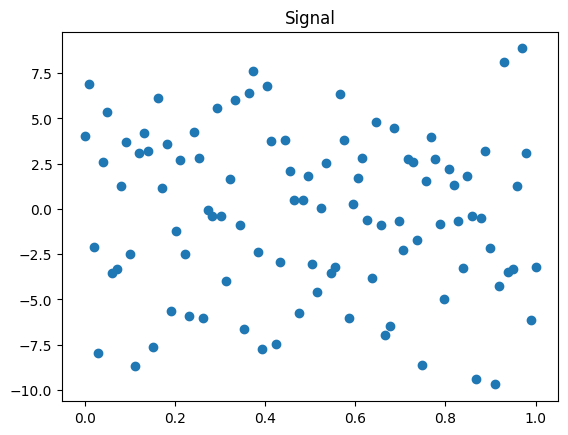

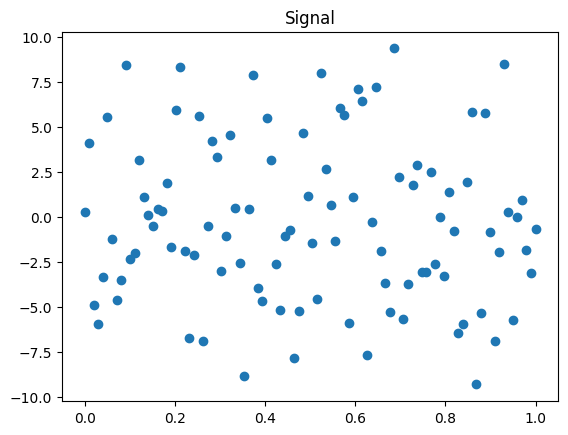

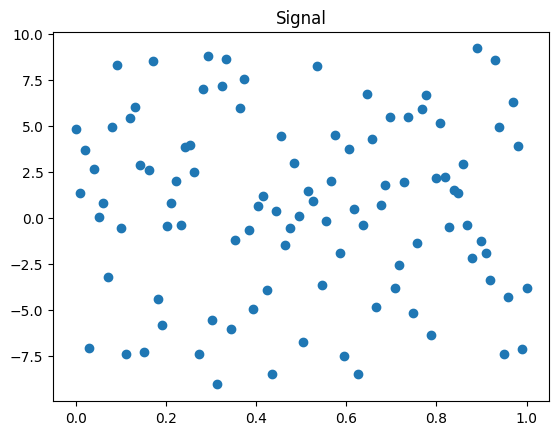

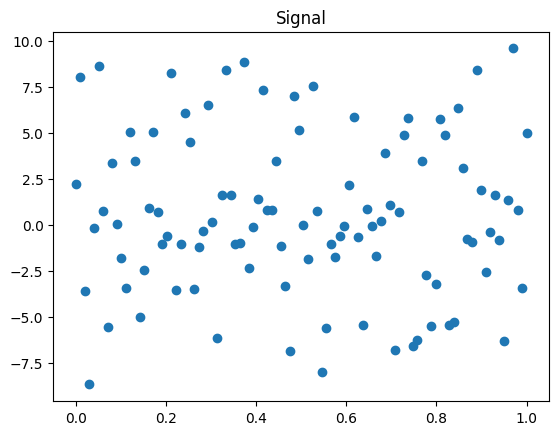

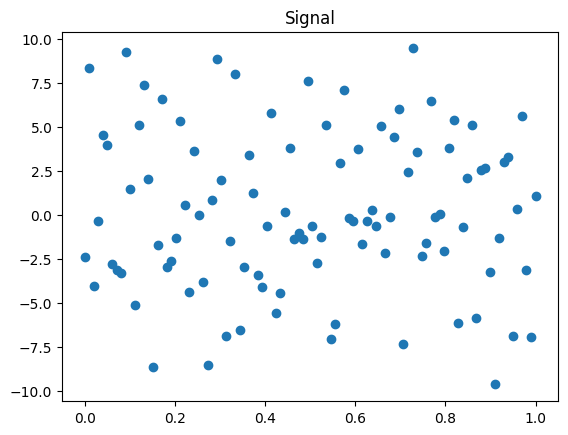

In [198]:
predicted_labels = (model3.predict(x_test) > 0.5).astype(int)
for i in range(10):
  label='Signal' if predicted_labels[4995+i]==1 else 'Noise'
  plt.plot(t,x_test[4995+i],'o')
  plt.title(label)
  plt.show()

In [199]:
counter=0
for i in range(len(y_test)):
  if predicted_labels[i]==y_test[i]:
    counter +=1
print(counter)

9922


still very good